In [70]:
import pandas as pd
import numpy as np


In [101]:
data = pd.read_csv("creditcard.csv")

# Data Preprocessing

In [102]:
from sklearn.preprocessing import StandardScaler
data["normalized_amount"] = StandardScaler().fit_transform(data["Amount"].values.reshape(-1,1))

data = data.drop(columns = ["Amount"])

data = data.drop(columns = ["Time"])
#print(data.head())


In [103]:
x = data.iloc[:, data.columns != "Class"]
y = data.iloc[:, data.columns == "Class"]
#print(x.head())
#print(y.head())

In [99]:
fraud = y.loc[y["Class"] == 1]
non_fraud = y.loc[y["Class"] == 0]
print("fraudulent = ", len(fraud))
print("non_fradulent = ", len(non_fraud))
print("%fraudulent = ", round(len(fraud)*100/len(y),2))
print("%non_fradulent = ", round(len(non_fraud)*100/len(y),2))

fraudulent =  492
non_fradulent =  284315
%fraudulent =  0.17
%non_fradulent =  99.83


# Under Sampling

In [127]:
normal_indices = data[data.Class == 0].index
fraud_indices = np.array(data[data.Class == 1].index)
random_normal_indices = np.random.choice(normal_indices, len(fraud), replace = False)
random_normal_indices = np.array(random_normal_indices)
print("random_normal_indices = ", len(random_normal_indices))
print("fraud_indices = ", len(fraud_indices))

undersample_indices = np.concatenate([fraud_indices,random_normal_indices])
undersample = data.iloc[undersample_indices,:]

x_under = undersample.iloc[:, undersample.columns != "Class"]
y_under = undersample.iloc[:, undersample.columns == "Class"]
 

random_normal_indices =  492
fraud_indices =  492


# Over Sampling (SMOTE)

In [133]:
from imblearn.over_sampling import SMOTE
x_oversample, y_oversample = SMOTE().fit_resample(x, y.values.ravel())
x_oversample = pd.DataFrame(x_oversample)
y_oversample = pd.DataFrame(y_oversample)

print(len(x_oversample))

568630


# Splitting Data

In [135]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_under_train, x_under_test, y_under_train, y_under_test = train_test_split(x_under, y_under, test_size = 0.3, random_state = 0)
x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(x_oversample, y_oversample, test_size = 0.3, random_state = 0)

x_over_train = np.array(x_over_train)
x_over_test = np.array(x_over_test)
y_over_train = np.array(y_over_train)
x_over_test = np.array(x_over_test)

# Confusion Matrix

In [80]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, format(cm[i, j], fmt),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black")
            
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    plt.tight_layout()

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators = 100)
randomforest.fit(x_train,y_train.values.ravel())
y_pred = randomforest.predict(x_test)


In [123]:
y_score = randomforest.score(x_test,y_test)
print("Accuracy = ", y_score)

Accuracy =  0.9995084442259752


Confusion matrix, without normalization


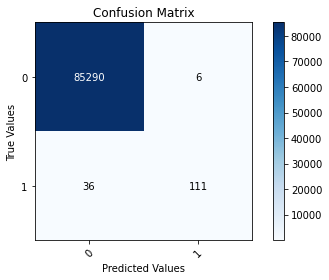

In [81]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

# Random Forest (Under Sampling)

In [115]:
random_forest_under = RandomForestClassifier(n_estimators=100)
random_forest_under.fit(x_under_train, y_under_train.values.ravel())
y_pred_under = random_forest_under.predict(x_under_test)


In [124]:
y_pred_under_score = random_forest_under.score(x_under_test, y_under_test)
print("Accuracy = ", y_pred_under_score)

Accuracy =  0.956081081081081


Confusion matrix, without normalization


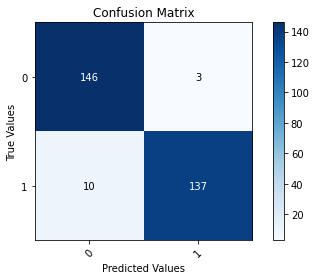

In [119]:
cnf_matrix_under = confusion_matrix(y_under_test, y_pred_under)
plot_confusion_matrix(cnf_matrix_under, classes=[0,1])

# Random Forest (Over Sampling)

In [138]:
random_forest_over = RandomForestClassifier(n_estimators = 100)
random_forest_over.fit(x_over_train, y_over_train.ravel())
y_pred_over = random_forest_over.predict(x_over_test)


In [139]:
y_pred_over_score = random_forest_over.score(x_over_test, y_over_test)
print("Accuracy = ", y_pred_over_score)

Accuracy =  0.9998827591462521


Confusion matrix, without normalization


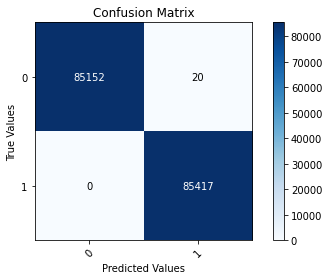

In [140]:
cnf_matrix_over = confusion_matrix(y_over_test, y_pred_over)
plot_confusion_matrix(cnf_matrix_over, classes=[0,1])

# Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train.values.ravel())
y_dectree_true = dec_tree.predict(x_test)


In [125]:
y_dectree_score = dec_tree.score(x_test,y_test)
print("Accuracy = ", y_dectree_score)

Accuracy =  0.9992860737567735


Confusion matrix, without normalization


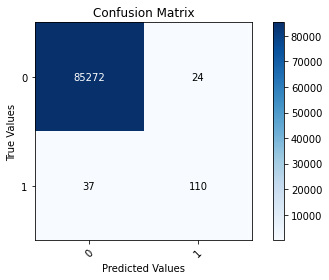

In [85]:
cnf_matrix_dt = confusion_matrix(y_test, y_dectree_true)
plot_confusion_matrix(cnf_matrix_dt, classes=[0,1])

# Decision Tree (Over Sampling)

In [142]:
dec_tree_over = DecisionTreeClassifier()
dec_tree_over.fit(x_over_train, y_over_train.ravel())
y_pred_dectree_over = dec_tree_over.predict(x_over_test)

In [143]:
y_dectree_over_score = dec_tree_over.score(x_over_test, y_over_test)
print("Accuracy = ", y_dectree_over_score)

Accuracy =  0.9978779405471631


Confusion matrix, without normalization


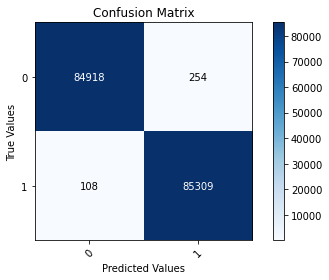

In [144]:
cnf_matrix_dectree_over = confusion_matrix(y_over_test, y_pred_dectree_over)
plot_confusion_matrix(cnf_matrix_dectree_over, classes=[0,1])

# XG Boost (Over Sampling)

In [154]:
from xgboost import XGBClassifier
xgb_over = XGBClassifier(use_label_encoder=False)
xgb_over.fit(x_over_train, y_over_train.ravel())
y_pred_xgb_over = xgb_over.predict(x_over_test)

[10:12:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [156]:
xgb_over_score = xgb_over.score(x_over_test, y_over_test)
print("Accuracy = ", xgb_over_score)

0.9997362080790673


Confusion matrix, without normalization


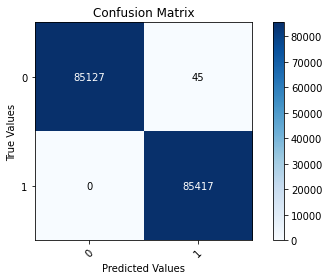

In [157]:
cnf_matrix_xgb_over = confusion_matrix(y_over_test, y_pred_xgb_over)
plot_confusion_matrix(cnf_matrix_xgb_over, classes=[0,1])